<a href="https://colab.research.google.com/github/nesstron/raspberryshake/blob/main/RaspberryShake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Colab Notebook 

This Notebook will be used for downloading data from Raspberry Shake.






# Installing necessary Packages
Run the code line below to import and install numpy and matplotlib packages

These are used for working with numbers and plotting graphs in Python

In [ ]:
try:
  import numpy as np
except:
  !pip install numpy

In [ ]:
try:
  import matplotlib.pyplot as plt
except:
  !pip install matplotlib

# Plotting graphs with Python

To get started, we shall go through some simple exercises to understand what coding is all about. 

The code below shows a simple way of plotting the equation for a straight line -> y = mx + c. The green text next to each code will explain what the specific line is doing.

Once you have changed the 'x' values to a range of numbers you want, click on 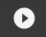 to run the code. You will then see the plot.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt # Both lines import the numpy and matplotlib coding package

# Here, the variables are being defined:
m = 2 # The gradient of the equation is a constant value at 2.
x = np.arange(-10,11,1) # Using numpy, a list of numbers ranging from -10 to 10 is created.
c = 2 # The y-intercept is defined.
y = m*x+c # The equation of a stright line is defined.

print('The x values are', x) # These values of x are printed above the graph.
plt.plot(x,y) # Using matplotlib, the code tells your computer to plot x VS y.
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0") # These 2 lines are plotting the x and y axis centred at the point (0,0)
plt.grid()

# Onto Real Data

Run the code line below to import and install the obspy package. This is used for reading seismological data.

Remember, to run the code, click on the 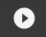 icon. Note that the download may take a moment.

In [ ]:
try:
  import obspy
except:
  !pip install obspy

## Restart Runtime

After installing obspy, you need to restart the runtime. Select the "Runtime" menu, and select "Restart runtime" then re-run the code.

(This is due to a subtlety of how Google Colab works)

# Using historical data

Note that each section of code is called a cell. So, in the first cell is a code used to create a file with different sets of data taken from a Raspberry Shake.

For example, the first file is named 'Cardiff', as it is data from a Raspberry Shake in Cardiff. This line of code is given a URL (i.e 'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-1') which contains the data. It then extracts this data and converts the file into a "Cardiff.mseed" file. The file is then stored in the local repository image.png.





In [ ]:
files={
    'Cardiff':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-1','filename':'Cardiff.mseed'},
    'Sydney':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-2','filename':'Sydney.mseed'},
    'California':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-3','filename':'California.mseed'},
    'Greenland':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-5','filename':'Greenland.mseed'},
    'China':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-6','filename':'China.mseed'},
    'China2.0':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-7','filename':'China2.0.mseed'},
    'Philipines':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-8','filename':'Philipines.mseed'},
    'Japan':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-9','filename':'Japan.mseed'},
    'Mexico_South_Border':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-10','filename':'Mexico.mseed'},
}

# Tech plate info
Sydney, California and China data is near tectonic plates

The Shakes in Sydney and California are 4 Component Seismograph and the shakes in Cardiff, Greenland and China are 1 Component Seismograph

# Downloading files

This script downloads the file chosen with the name 

To change the name change the text between the ' ' marks on the first line to one in the list below 

* Cardiff
* Sydney
* California
* Greenland
* China
* China2.0
* Philipines
* Japan
* Mexico_South_Border




Example

`name ='Cardiff'`

In [ ]:
name ='Japan' 
import os
if not os.path.isfile(files[name]['filename']):
  command='wget {} -O {}'.format(files[name]['url'],files[name]['filename'])
  print('running command:',command)
  res=os.system(command)
  if res==0:
    print('file successfully dowloaded to {}'.format(files[name]['filename']))
  else:
    print('problem downloading from {}: {}'.format(files[name]['url'],res))
else:
  print('File already downloaded to {}'.format(files[name]['filename']))

# Plotting the data using obspy

At this point, we have imported the data from the Raspberry Shakes around the world, the packages needed to plot the data and we have also created the code necessary to plot.

now we simply need to tell your computer to plot this data:

In [ ]:
import obspy
print(files[name]['filename'])
stream = obspy.read(files[name]['filename']) 
stream.plot(); # The 'Stream' then puts the data into a plot 

# What is This Plot Showing?
As said prevously, the Raspberry Shake measures motion in a certain direction over an amount of time. It is then plotted as shown above. 

Therefore, the plot must be showing the speed at which the Raspberry Shake is vibrating on the y-axis (vertical axis) and how this speed changes with time is plotted on the x-axis (horizontal axis).

## Plotting a More Specific Time Range of Data

The previous plot shows the speed of vibration of the Raspberry Shake over the entire period of data. This long period makes it hard to analyise as the time is squeezed into a small plot.

The code below is provided to re-create the plot of data but over a specific period of time within the  plot. Specifically 1 hour.

Note that in the UTCDateTime() code, the format is YEAR-MONTH-DAY HOUR:MINUTE:SECOND. These pieces of information are seen at the top of each plot - the time can be chosen based on the time range on the x-axis.

You'll need to change the values for starttime and endtime to make sure they are possible with the plot you have done above if you are switching between different countries. 

If you wish to increase the time shown, you can adjust the value on `starttime + 3600` 3600 is in seconds so 60 = 1 minute, 3600 = 1 hour etc.

In [ ]:
from obspy import UTCDateTime

starttime = UTCDateTime("2022-03-25 00:00:00")
endtime = starttime + 39600
print('plotting from {} to {}'.format(starttime,endtime))
stream.plot(starttime=starttime, endtime=endtime); # This creates the new plot.

# Questions - Plot 1:

1a) What can be said about the activity of the place where this data has come from?

1b) provide a sentence, or two, explaining evidence for your answer in part a).

1c) At what point can you say that the device measured low ground movement? 

Compare this to a point on the graph with high ground movement.

# Using data from Shakes around the world

Now we'll going to use historical data from other shakes

We download the data using FSDN Web Services to access station data. 

We can specify the date and time for the date and time range like before.

As well as 

*   Network
*   Station
*   Location
*   Channel

These are what the AM, R24FA, 00 and EHZ refer to respectively in `client.get_waveforms()`


To find the stations you can use the Station View Map https://stationview.raspberryshake.org/

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
start_1 = "2020-01-01 00:00:00"
starttime = UTCDateTime(start_1)
endtime = starttime + 3600     # 600 seconds
client = Client('RASPISHAKE')
waveform = client.get_waveforms('AM', 'R24FA', '00', 'EHZ', starttime, endtime)
waveform.plot();

# Contrasting Data from different timezones

We're going to look at the difference in a 24 hour period between two shakes

Both are located in different areas.

Can you tell how far apart they are?

The first is located in London, England

The second is located in Wellington, New Zealand

In [ ]:
starttime = UTCDateTime("2022-06-14 00:00:00")
endtime = starttime + 86400     
client = Client('RASPISHAKE')
waveform = client.get_waveforms('AM', 'RE25F', '00', 'EHZ', starttime, endtime)
waveform.plot();

starttime = UTCDateTime("2022-06-14 00:00:00")
endtime = starttime + 86400     
client = Client('RASPISHAKE')
waveform = client.get_waveforms('AM', 'RE12C', '00', 'EHZ', starttime, endtime)
waveform.plot();

starttime = UTCDateTime("2022-06-17 00:00:00")
endtime = starttime + 3600    
client = Client('RASPISHAKE')
waveform = client.get_waveforms('AM', 'R53EF', '00', 'EHZ', starttime, endtime)
waveform.plot();


# Explanation

The reason is due to the timezones each Shake is in. 
The first is located in London 1 hour ahead of UTC.
The second is located in Wellington and is 12 hours ahead of UTC.

This can be seen when you convert the time zones in the second graph - it mostly lines up the times that people would be active near it. (Commuting, Daylight hours etc)